In [2]:
print('数据增强的常用方法。..。.')



数据增强的常用方法。..。.


In [3]:
from PIL import Image
from torchvision import transforms as tfs




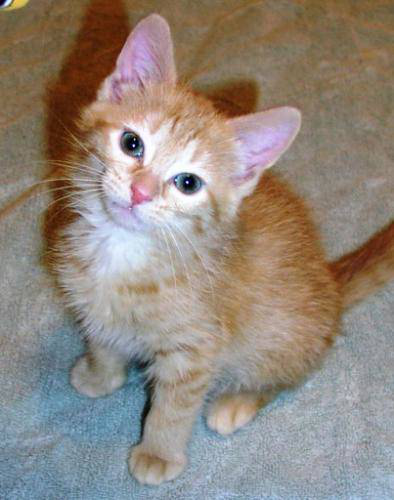

In [4]:
im = Image.open('../data/cat.png')
im

In [5]:
# 随机比例缩放
print('before scale, shape: {}'.format(im.size))
new_im = tfs.Resize((100, 200))(im)
print('after scale, shape: {}'.format(new_im.size))




before scale, shape: (394, 500)
after scale, shape: (200, 100)


In [6]:
# 随机位置截取
random_im1 = tfs.RandomCrop(100)(im)




In [7]:
random_im2 = tfs.RandomCrop(200)(im)


In [8]:
center_im = tfs.CenterCrop(100)(im)


In [9]:
# 随机的水平翻转
h_flip = tfs.RandomHorizontalFlip()(im)




In [10]:
# 随机的竖直翻转
v_flip = tfs.RandomVerticalFlip()(im)



In [11]:
# 随机角度旋转
rot_im = tfs.RandomRotation(45)(im)




In [12]:
# 亮度、对比度和颜色变化
bright_im = tfs.ColorJitter(brightness=1)(im)




In [13]:
contrast_im = tfs.ColorJitter(contrast=1)(im)



In [14]:
color_im = tfs.ColorJitter(hue=0.5)(im)



In [15]:
# 组合使用
im_aug = tfs.Compose([
    tfs.Resize(120),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96),
    tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])



In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

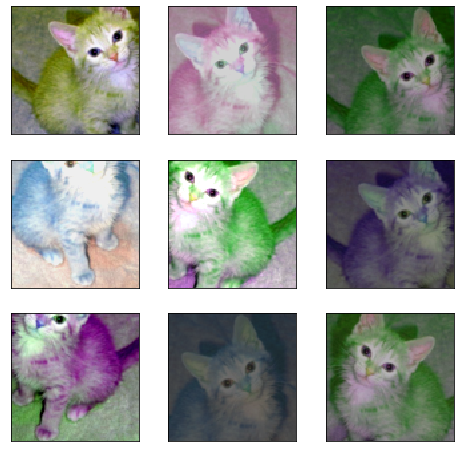

In [17]:
nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)

plt.show()


In [18]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
from C5_CNN.utils import train, resnet
from torchvision import transforms as tfs

In [19]:
# 使用数据增强
def train_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(120),
        tfs.RandomHorizontalFlip(),
        tfs.RandomCrop(96),
        tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5),
        tfs.ToTensor(),
        tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    x = im_aug(x)
    return x

def test_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    x = im_aug(x)
    return x

train_set = CIFAR10('../data', train=True, transform=train_tf)
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = CIFAR10('../data', train=False, transform=test_tf)
test_data = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

net = resnet(3, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
train(net, train_data, test_data, 10, optimizer, criterion)


/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:52: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  im = Variable(im.cuda(), volatile=True)
/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:53: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label.cuda(), volatile=True)


Epoch 0. Train Loss: 1.872787, Train Acc: 0.309962, Valid Loss: 2.003587, Valid Acc: 0.312797, Time 00:02:32
Epoch 1. Train Loss: 1.451574, Train Acc: 0.480898, Valid Loss: 2.055508, Valid Acc: 0.382021, Time 00:02:42
Epoch 2. Train Loss: 1.220881, Train Acc: 0.568155, Valid Loss: 1.208745, Valid Acc: 0.580103, Time 00:02:39
Epoch 3. Train Loss: 1.067085, Train Acc: 0.624920, Valid Loss: 2.088625, Valid Acc: 0.401800, Time 00:02:40
Epoch 4. Train Loss: 0.953797, Train Acc: 0.666740, Valid Loss: 1.178276, Valid Acc: 0.615407, Time 00:02:41
Epoch 5. Train Loss: 0.877483, Train Acc: 0.694114, Valid Loss: 1.317573, Valid Acc: 0.576147, Time 00:02:40
Epoch 6. Train Loss: 0.814742, Train Acc: 0.716712, Valid Loss: 1.414128, Valid Acc: 0.555380, Time 00:02:38
Epoch 7. Train Loss: 0.766370, Train Acc: 0.733256, Valid Loss: 1.042209, Valid Acc: 0.651998, Time 00:02:39
Epoch 8. Train Loss: 0.725262, Train Acc: 0.749860, Valid Loss: 0.737878, Valid Acc: 0.747627, Time 00:02:40
Epoch 9. Train Loss

In [20]:
# 不使用数据增强
def data_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    x = im_aug(x)
    return x

train_set = CIFAR10('../data', train=True, transform=data_tf)
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = CIFAR10('../data', train=False, transform=data_tf)
test_data = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

net = resnet(3, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
train(net, train_data, test_data, 10, optimizer, criterion)

Epoch 0. Train Loss: 1.440124, Train Acc: 0.473006, Valid Loss: 1.434070, Valid Acc: 0.495154, Time 00:01:26
Epoch 1. Train Loss: 1.013326, Train Acc: 0.637828, Valid Loss: 1.214898, Valid Acc: 0.571400, Time 00:01:34
Epoch 2. Train Loss: 0.793545, Train Acc: 0.721707, Valid Loss: 1.608895, Valid Acc: 0.484968, Time 00:01:33
Epoch 3. Train Loss: 0.629903, Train Acc: 0.783408, Valid Loss: 1.060109, Valid Acc: 0.647745, Time 00:01:34
Epoch 4. Train Loss: 0.499650, Train Acc: 0.828165, Valid Loss: 0.910025, Valid Acc: 0.701246, Time 00:01:33
Epoch 5. Train Loss: 0.389601, Train Acc: 0.867747, Valid Loss: 0.810890, Valid Acc: 0.734276, Time 00:01:34
Epoch 6. Train Loss: 0.285858, Train Acc: 0.903313, Valid Loss: 1.455519, Valid Acc: 0.601365, Time 00:01:34
Epoch 7. Train Loss: 0.219079, Train Acc: 0.926451, Valid Loss: 1.396129, Valid Acc: 0.634494, Time 00:01:33
Epoch 8. Train Loss: 0.156531, Train Acc: 0.948769, Valid Loss: 1.096851, Valid Acc: 0.701543, Time 00:01:33
Epoch 9. Train Loss